<a href="https://colab.research.google.com/github/Lariiuki/Pos-Deep-Learning/blob/main/Dataset_teen_phone_addiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset dependência do uso de smartphones por adolescentes

**Descrição:** Esse notebook utiliza dados comportamentais que relaciona o uso de smartphones por adolescentes aos níveis de dependência e à saúde, com foco especial em níveis de dependência, desempenho acadêmico, distribuição de tempo, proxies de saúde mental e física e também permite que pesquisadores, educadores, psicólogos e cientistas de dados explorem e modelem tendências comportamentais e criem modelos de classificação ou regressão para prever níveis de dependência, desemponho ou resultados de colocação. Dataset disponível no Kaggle, e contém **3000 entradas e 25 atributos.**

**Informações do dataset**

| Nome da Coluna            | Descrição                                                                 |
|----------------------------|---------------------------------------------------------------------------|
| `ID`                      | Identificador único do participante                                       |
| `Name`                    | Nome do participante                                                     |
| `Age`                     | Idade do participante                                                    |
| `Gender`                  | Identidade de gênero do participante                                     |
| `Location`                | Localização do participante                                              |
| `School_Grade`            | Série/ano escolar                                                        |
| `Daily_Usage_Hours`       | Tempo médio diário de uso do celular (em horas)                          |
| `Sleep_Hours`             | Número de horas de sono por noite                                        |
| `Academic_Performance`    | Pontuação acadêmica ou GPA                                               |
| `Social_Interactions`     | Quantidade de interações sociais por dia                                 |
| `Exercise_Hours`          | Número de horas de atividade física por semana                           |
| `Anxiety_Level`           | Nível de ansiedade                                                       |
| `Depression_Level`        | Nível de depressão                                                       |
| `Self_Esteem`             | Nível de autoestima                                                      |
| `Parental_Control`        | Grau de controle parental sobre o uso do telefone                        |
| `Screen_Time_Before_Bed`  | Tempo de tela antes de dormir (em horas)                                 |
| `Phone_Checks_Per_Day`    | Quantas vezes o participante verifica o telefone por dia                 |
| `Apps_Used_Daily`         | Quantidade de aplicativos usados diariamente                             |
| `Time_on_Social_Media`    | Tempo médio diário gasto em redes sociais (em horas)                     |
| `Time_on_Gaming`          | Tempo de jogo diário (em horas)                                          |
| `Time_on_Education`       | Tempo diário de estudo/aprendizagem (em horas)                           |
| `Phone_Usage_Purpose`     | Objetivo principal do uso do telefone (social, jogos, educação, etc.)    |
| `Family_Communication`    | Quantidade de interações familiares por dia                              |
| `Weekend_Usage_Hours`     | Horas de uso do celular nos fins de semana                               |
| `Addiction_Level`         | Nível de vício em telefone/tela                                          |
| `IQ`                      | Pontuação de inteligência (auto-relatada ou estimada)                    |
| `CG`                      | Nota cumulativa (ou métrica geral de desempenho)                         |
| `Internship_Experience`   | Indicação de experiência de estágio                                      |
| `Projects_Completed`      | Número de projetos acadêmicos ou pessoais concluídos                     |
| `Placement`               | Status de colocação (selecionado/não selecionado)                        |


**Dataset:** [Vício dos adolescentes nos smartphones](https://www.kaggle.com/datasets/sumedh1507/teen-phone-addiction/data)

In [235]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import os
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
# visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #divisao dos dados em treino e teste
from sklearn.metrics import classification_report #metricas para avaliar o desempenho
from mlxtend.plotting import plot_decision_regions
import numpy as np

In [236]:
path = kagglehub.dataset_download("sumedh1507/teen-phone-addiction")
print("Path to dataset files:", path)
print("Name path", os.listdir(path))

Path to dataset files: /kaggle/input/teen-phone-addiction
Name path ['teen_phone_addiction_dataset.csv']


In [237]:
csv_file = os.path.join(path, 'teen_phone_addiction_dataset.csv')
df = pd.read_csv(csv_file)
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [238]:
target_col = "Name"
print(f"Quantas classes existem nesse dataset: {len(df[target_col].unique())}")
print(f"Quantas instancias existem: {df.shape[0]}")
print(f"Quantidade features: {df.shape[1] -1}")

Quantas classes existem nesse dataset: 2933
Quantas instancias existem: 3000
Quantidade features: 24


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [240]:
# fazendo uma copia da tabela original
df_pt = df.copy()

In [241]:
# transformando o nome das colunas em portugues
colunas_traducao = {
    "ID": "ID",
    "Name": "Nome",
    "Age": "Idade",
    "Gender": "Gênero",
    "Location": "Localização",
    "School_Grade": "Ano_Escolar",
    "Daily_Usage_Hours": "Horas_Uso_Diário",
    "Sleep_Hours": "Horas_Sono",
    "Academic_Performance": "Desempenho_Acadêmico",
    "Social_Interactions": "Interações_Sociais",
    "Exercise_Hours": "Horas_Exercício",
    "Anxiety_Level": "Nível_Ansiedade",
    "Depression_Level": "Nível_Depressão",
    "Self_Esteem": "Autoestima",
    "Parental_Control": "Controle_Parental",
    "Screen_Time_Before_Bed": "Tempo_Tela_Antes_Dormir",
    "Phone_Checks_Per_Day": "Checagens_Celular_Dia",
    "Apps_Used_Daily": "Apps_Usados_Diariamente",
    "Time_on_Social_Media": "Tempo_Redes_Sociais",
    "Time_on_Gaming": "Tempo_Jogos",
    "Time_on_Education": "Tempo_Educação",
    "Phone_Usage_Purpose": "Finalidade_Uso_Celular",
    "Family_Communication": "Comunicação_Familiar",
    "Weekend_Usage_Hours": "Horas_Uso_Fim_Semana",
    "Addiction_Level": "Nível_Vício",
    "IQ": "QI",
    "CG": "Nota_Cumulativa",
    "Internship_Experience": "Experiência_Estágio",
    "Projects_Completed": "Projetos_Concluídos",
    "Placement": "Colocação"
}

df_pt = df_pt.rename(columns=colunas_traducao)

df_pt.head()

,ID,Nome,Idade,Gênero,Localização,Ano_Escolar,Horas_Uso_Diário,Horas_Sono,Desempenho_Acadêmico,Interações_Sociais,...,Tempo_Tela_Antes_Dormir,Checagens_Celular_Dia,Apps_Usados_Diariamente,Tempo_Redes_Sociais,Tempo_Jogos,Tempo_Educação,Finalidade_Uso_Celular,Comunicação_Familiar,Horas_Uso_Fim_Semana,Nível_Vício
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [242]:
mapa_valores = {
    "Browsing": "Navegação",
    "Other": "Outro",
    "Education": "Educação",
    "Social Media": "Redes Sociais",
    "Gaming": "Jogos"
}

df_pt["Finalidade_Uso_Celular"] = df_pt["Finalidade_Uso_Celular"].replace(mapa_valores)

print(df_pt["Finalidade_Uso_Celular"].value_counts())

Finalidade_Uso_Celular
Navegação        627
Outro            622
Educação         602
Redes Sociais    575
Jogos            574
Name: count, dtype: int64


In [243]:
genero_valores = {
    "Other": "Outros",
    "Male": "Masculino",
    "Female": "Feminino"
}

df_pt["Gênero"] = df_pt["Gênero"].replace(genero_valores)

print(df_pt["Gênero"].value_counts())

Gênero
Masculino    1016
Feminino     1007
Outros        977
Name: count, dtype: int64


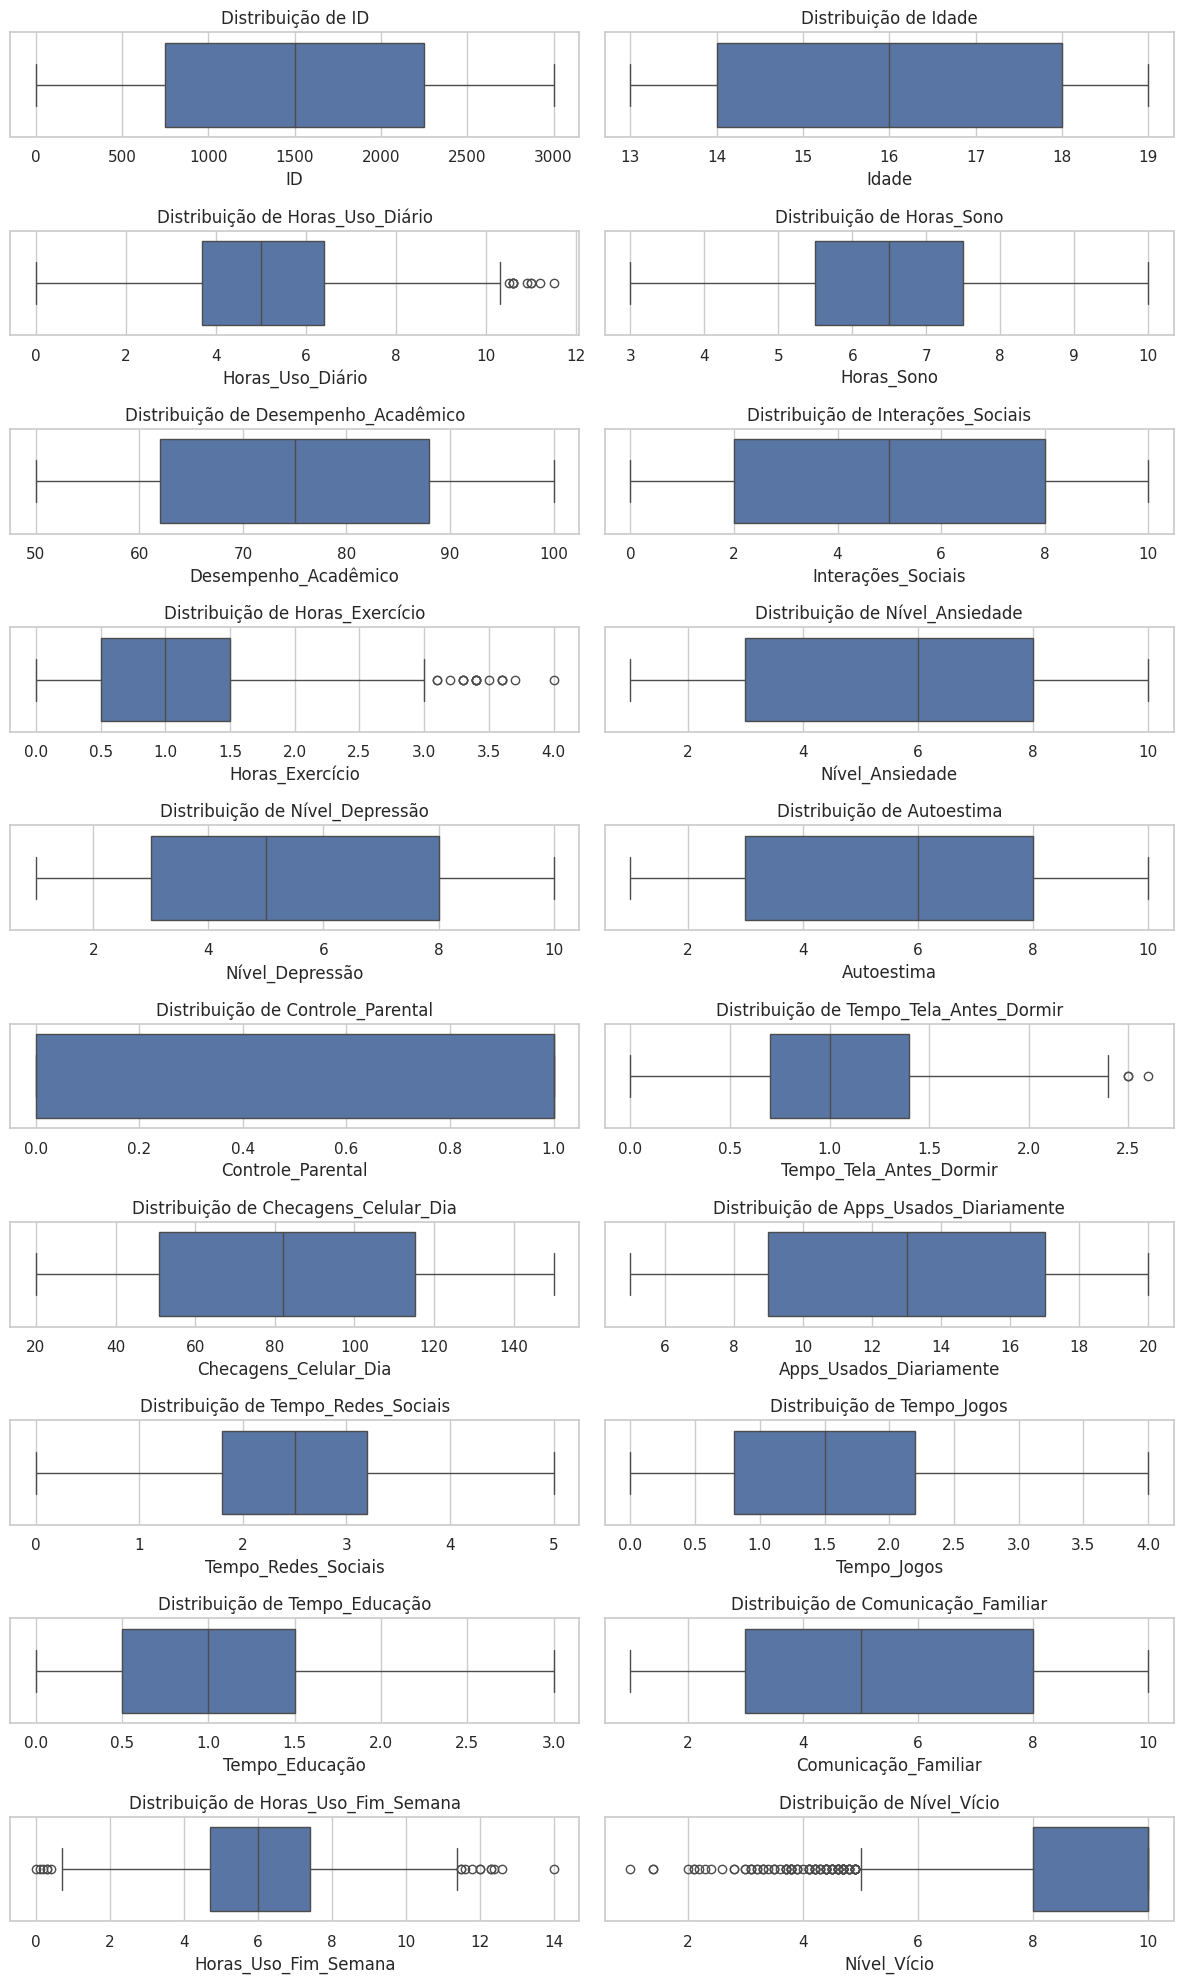

In [244]:
sns.set(style="whitegrid")
numerical_cols = ['ID', 'Idade', 'Horas_Uso_Diário', 'Horas_Sono', 'Desempenho_Acadêmico',
       'Interações_Sociais', 'Horas_Exercício', 'Nível_Ansiedade',
       'Nível_Depressão', 'Autoestima', 'Controle_Parental',
       'Tempo_Tela_Antes_Dormir', 'Checagens_Celular_Dia',
       'Apps_Usados_Diariamente', 'Tempo_Redes_Sociais', 'Tempo_Jogos',
       'Tempo_Educação', 'Comunicação_Familiar',
       'Horas_Uso_Fim_Semana', 'Nível_Vício']

num_plots = len(numerical_cols)

cols = 2
rows = (num_plots + 1) // cols

plt.figure(figsize=(12, rows * 2))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=df_pt[col].dropna())
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

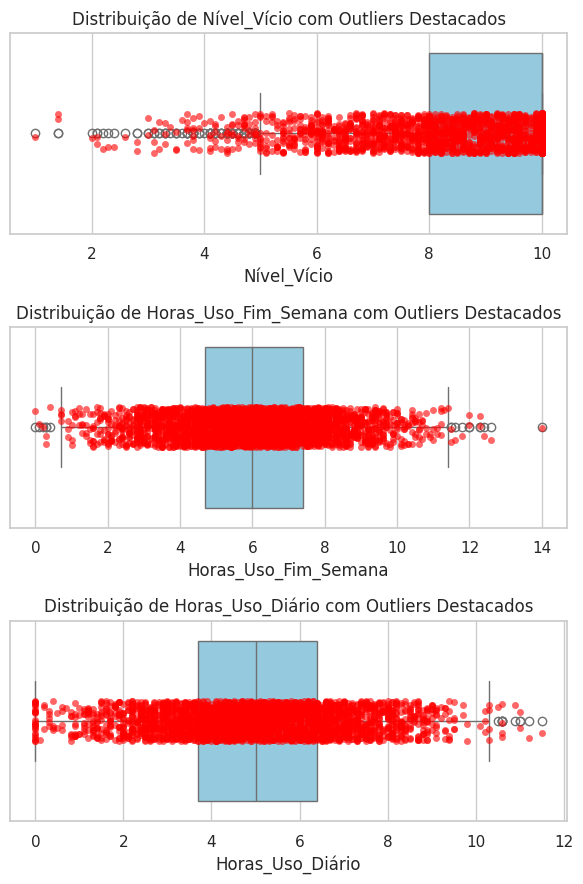

In [245]:
cols = ["Nível_Vício", "Horas_Uso_Fim_Semana", "Horas_Uso_Diário"]

fig, axes = plt.subplots(len(cols), figsize=(6, 3*len(cols)))

for ax, col in zip(axes, cols):
    sns.boxplot(x=df_pt[col], color="skyblue", ax=ax)
    sns.stripplot(x=df_pt[col], color="red", size=5, jitter=True, alpha=0.6, ax=ax)
    ax.set_title(f"Distribuição de {col} com Outliers Destacados")

plt.tight_layout()
plt.show()

In [246]:
# o problema de deletar os outliers da coluna do nível do vício é que podemos estar inviesando o dataset, pois eles estão distribuidos de 0 a 10 e estão dentro de um padrão normal
# outliers_nivel_vicio = df_pt[(df_pt['Nível_Vício'] >= 0) & (df_pt['Nível_Vício'] <= 5)]
# df_ct = df_pt.drop(outliers_nivel_vicio.index)
# df_ct.shape

# Análises

## Correlações

In [247]:
df_pt.columns

Index(['ID', 'Nome', 'Idade', 'Gênero', 'Localização', 'Ano_Escolar',
       'Horas_Uso_Diário', 'Horas_Sono', 'Desempenho_Acadêmico',
       'Interações_Sociais', 'Horas_Exercício', 'Nível_Ansiedade',
       'Nível_Depressão', 'Autoestima', 'Controle_Parental',
       'Tempo_Tela_Antes_Dormir', 'Checagens_Celular_Dia',
       'Apps_Usados_Diariamente', 'Tempo_Redes_Sociais', 'Tempo_Jogos',
       'Tempo_Educação', 'Finalidade_Uso_Celular', 'Comunicação_Familiar',
       'Horas_Uso_Fim_Semana', 'Nível_Vício'],
      dtype='object')

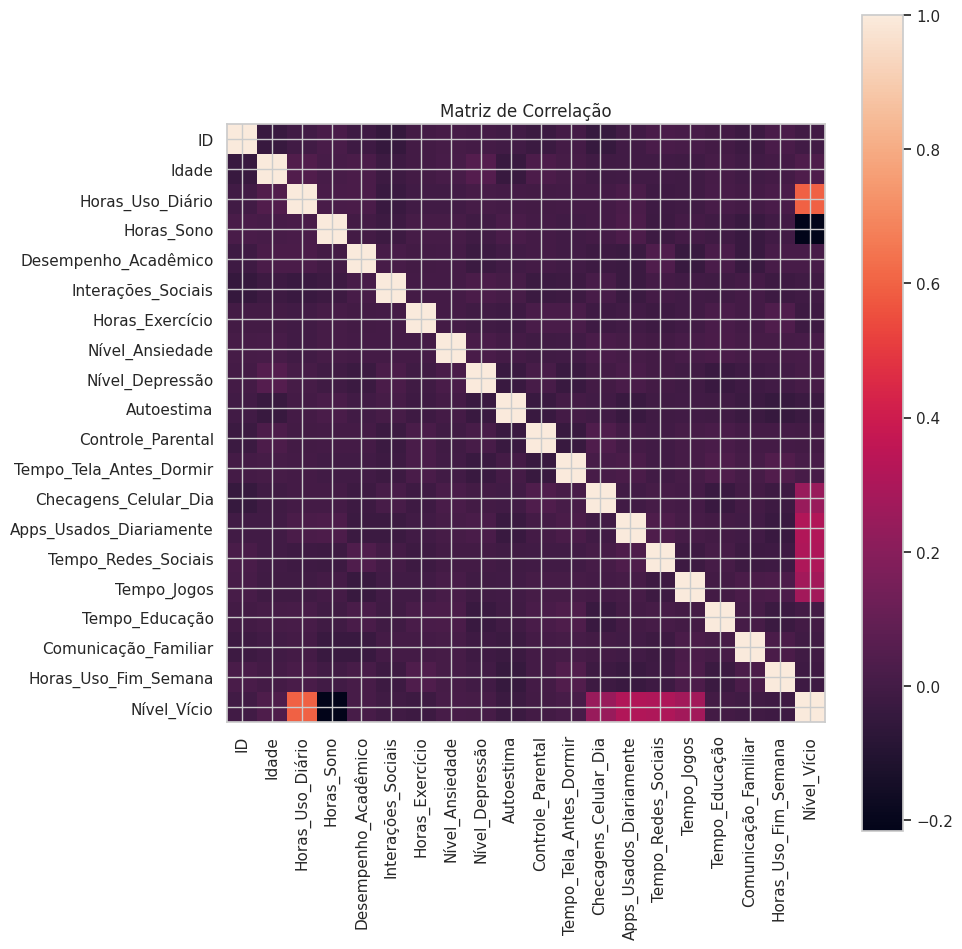

Resposta P1: Maiores correlações (valor absoluto):
 - Horas_Uso_Diário x Nível_Vício: 0.60
 - Apps_Usados_Diariamente x Nível_Vício: 0.32
 - Tempo_Redes_Sociais x Nível_Vício: 0.31


In [248]:
num_cols = df_pt.select_dtypes(include='number').columns.tolist()
corr = df_pt[num_cols].corr()

plt.figure(figsize=(10,10))
plt.imshow(corr, interpolation='nearest')
plt.title("Matriz de Correlação")
plt.colorbar()
plt.xticks(ticks=range(len(num_cols)), labels=num_cols, rotation=90)
plt.yticks(ticks=range(len(num_cols)), labels=num_cols)
plt.tight_layout()
plt.show()

pairs = []
for i in range(len(num_cols)):
    for j in range(i+1, len(num_cols)):
        pairs.append((num_cols[i], num_cols[j], corr.iloc[i, j]))
pairs_sorted = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)[:3]
print("Resposta P1: Maiores correlações (valor absoluto):")
for a,b,v in pairs_sorted:
    print(f" - {a} x {b}: {v:.2f}")

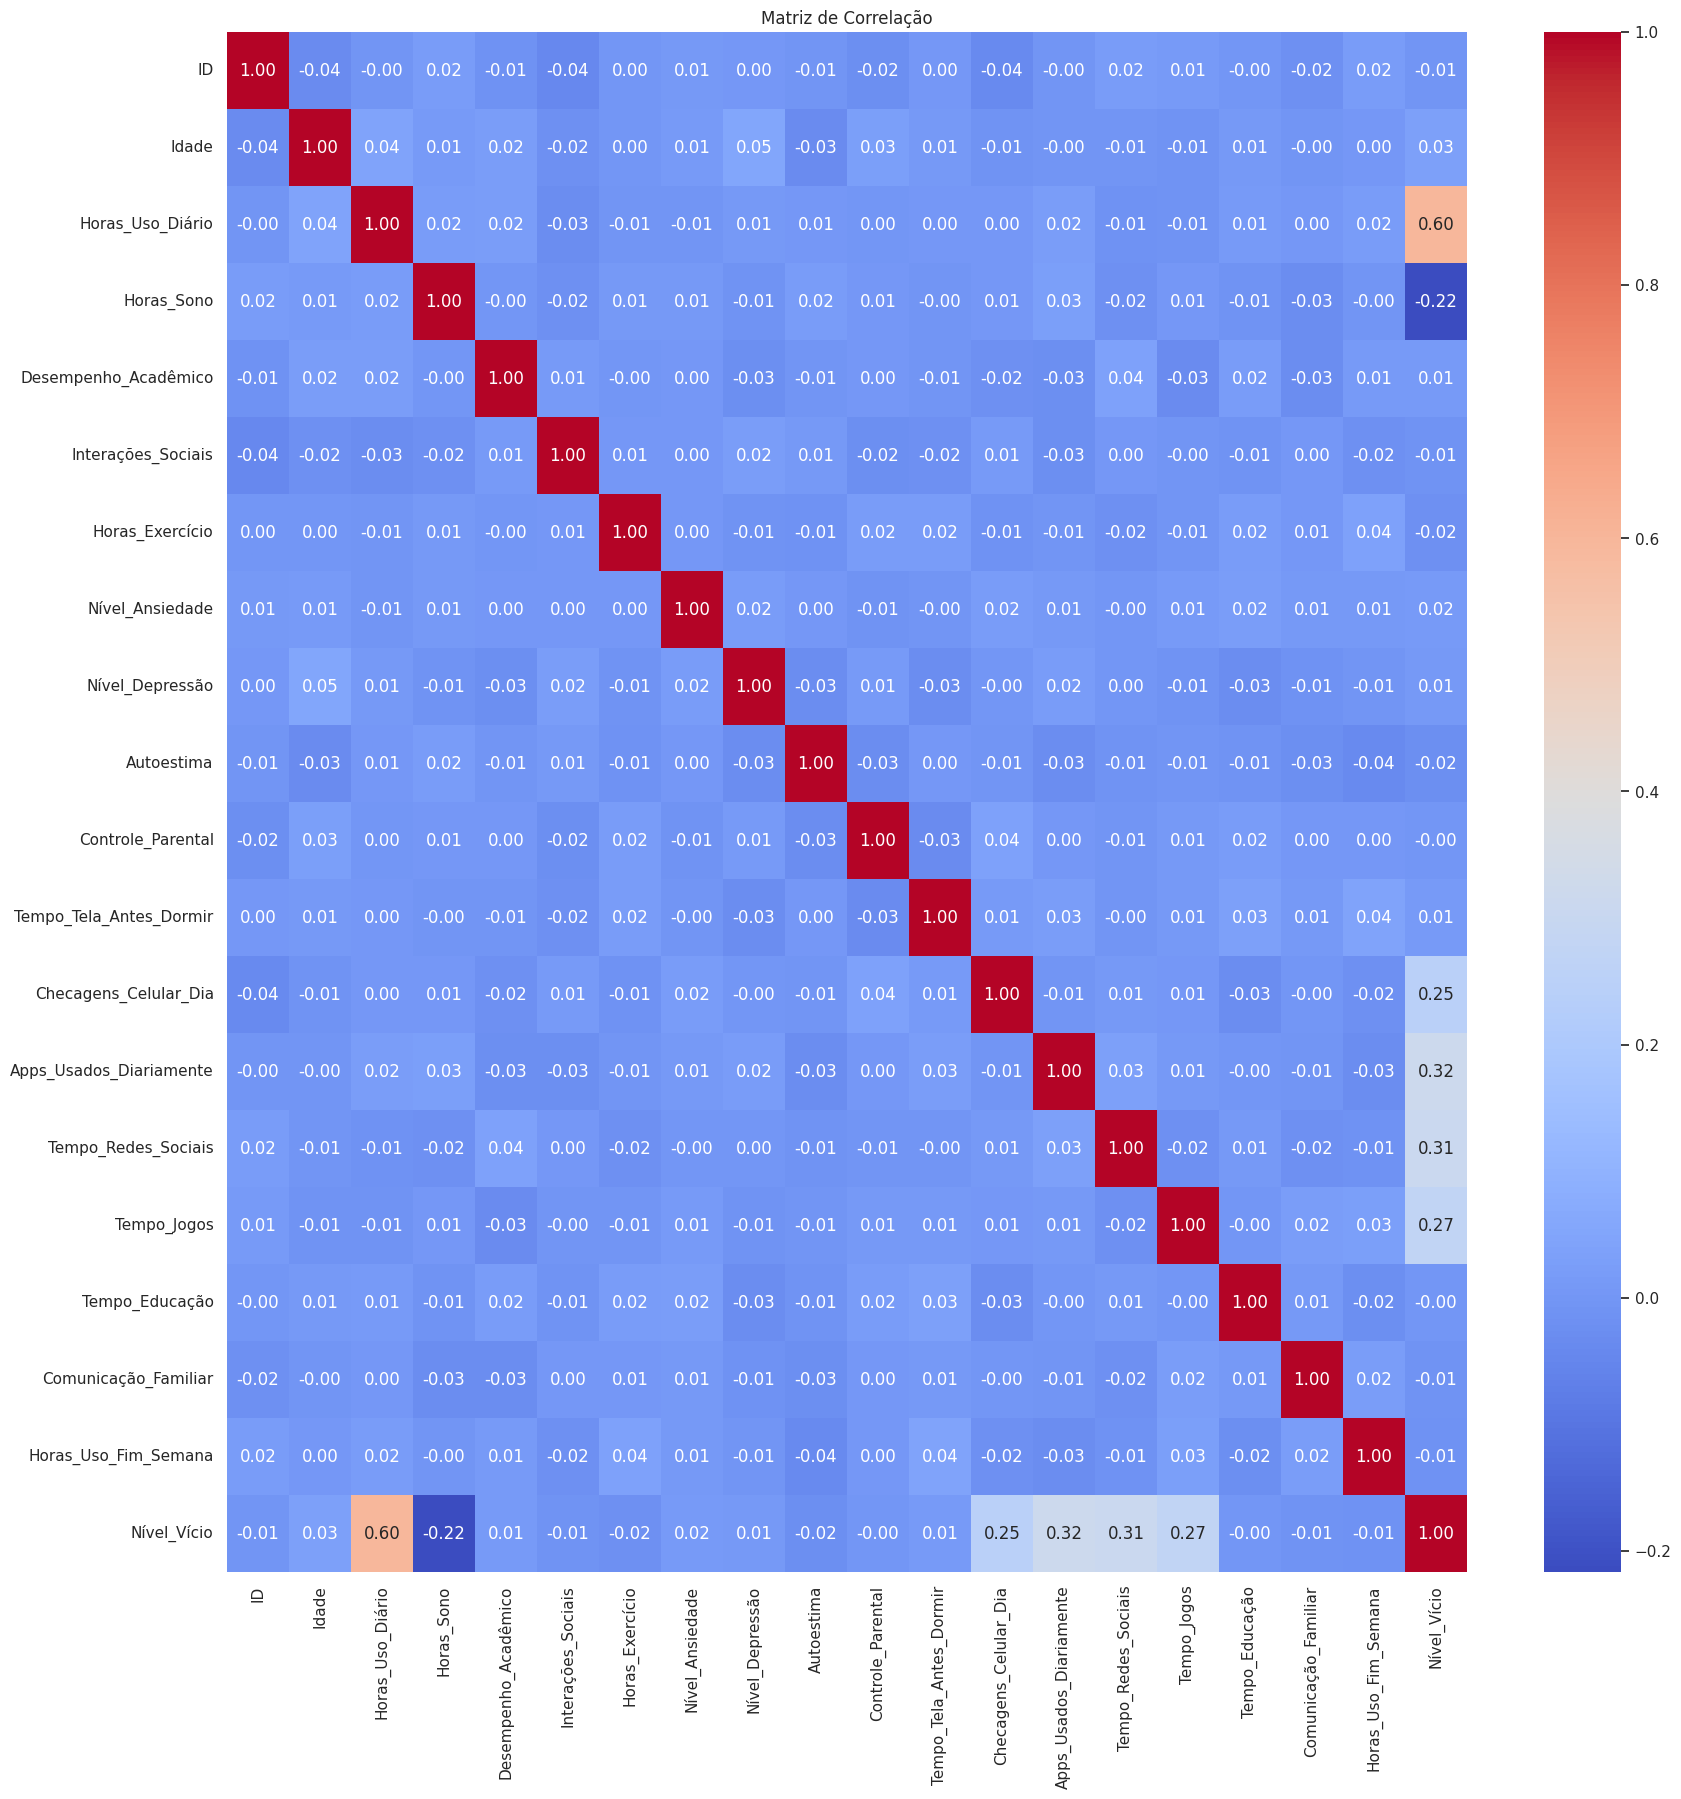

In [249]:
numeric_cols = df_pt.select_dtypes(include='number')

plt.figure(figsize=(20, 20))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()